In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, InputLayer

2024-10-21 08:48:27.941578: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 08:48:28.779701: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 08:48:31.948267: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-21 08:48:51.408096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
X_train.shape, len(X_train), np.prod(X_train.shape[1:])

((60000, 28, 28), 60000, 784)

In [8]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_train.shape

(60000, 784)

In [9]:
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test.shape

(10000, 784)

In [10]:
# 784 → 32 → 784
autoencoder = Sequential()

autoencoder.add(InputLayer(shape=(784,)))

autoencoder.add(Dense(units=32, activation='relu'))

autoencoder.add(Dense(units=784, activation='sigmoid'))
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

2024-10-21 08:49:07.899786: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50


2024-10-21 08:49:11.420696: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0087 - loss: 0.3831

2024-10-21 08:49:26.856881: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2024-10-21 08:49:26.966828: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.0087 - loss: 0.3826 - val_accuracy: 0.0080 - val_loss: 0.1919
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.0096 - loss: 0.1821 - val_accuracy: 0.0077 - val_loss: 0.1522
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.0106 - loss: 0.1478 - val_accuracy: 0.0099 - val_loss: 0.1322
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.0097 - loss: 0.1304 - val_accuracy: 0.0095 - val_loss: 0.1199
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.0092 - loss: 0.1191 - val_accuracy: 0.0105 - val_loss: 0.1117
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0097 - loss: 0.1113 - val_accuracy: 0.0127 - val_loss: 0.1058
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0109 - loss: 0.1060 - val_accuracy: 0.0134 - val_loss: 0.1015
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0117 - loss: 0.1020 - val_accuracy: 0.

In [13]:
original_dimension = Input(shape=(784,))
encoder_layer = autoencoder.layers[0]
encoder = Model(original_dimension, encoder_layer(original_dimension))
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
codified_images = encoder.predict(X_test)

2024-10-21 09:16:23.368359: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [ ]:
decotified_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


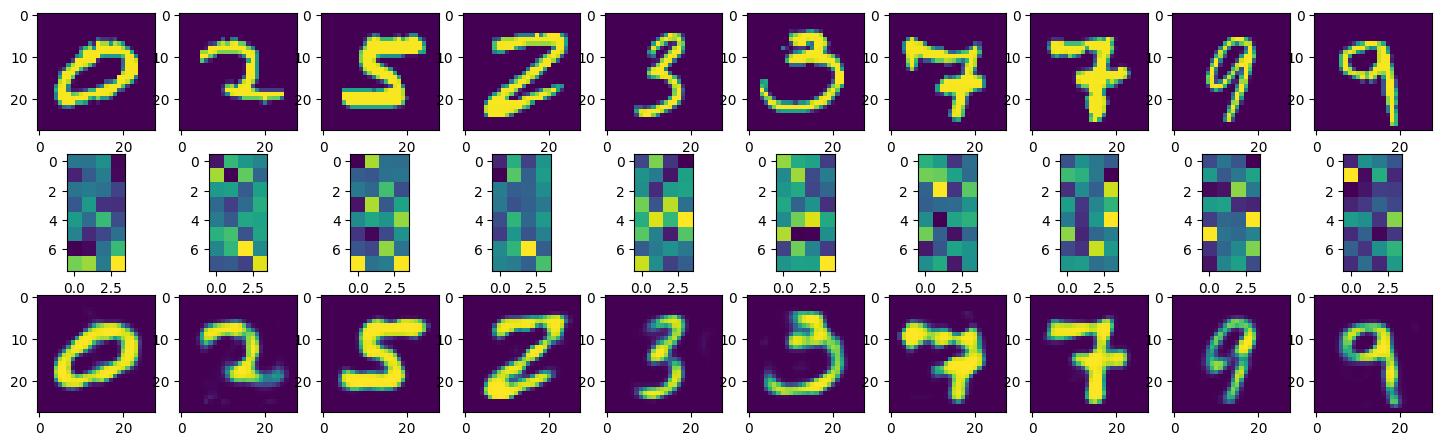

In [18]:
images_num = 10
test_images = np.random.randint(X_test.shape[0], size=images_num)
plt.figure(figsize=(18, 18))

for i, image_idx in enumerate(test_images):
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    plt.xticks()
    plt.yticks()
    
    #Imagem Codificada
    eixo = plt.subplot(10, 10, i + 1 + images_num)
    plt.imshow(codified_images[image_idx].reshape(8, 4))
    plt.xticks()
    plt.yticks()
    
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1 + images_num * 2)
    plt.imshow(decotified_images[image_idx].reshape(28, 28))
    plt.xticks()
    plt.yticks()